## Business Understanding
### Problem Statement
Matching job seekers with relevant job opportunities is crucial for both candidates and employers. However, traditional keyword-based search systems lack the intelligence to align jobs with an individual's holistic profile—skills, experience, and preferences—leading to inefficiencies.
#### Objective
Develop an intelligent NLP-based job recommendation system that uses the job description dataset to recommend suitable roles for applicants based on:
Their skills, qualifications, and experience. Job descriptions, required skills, and responsibilities.
#### Key Stakeholders
Applicants: Need personalized recommendations to find jobs aligned with their skillset and career goals. Employers: Want efficient shortlisting of relevant candidates. Recruitment Platforms: Seek to enhance user engagement and improve match accuracy.
#### Goals
For Job Seekers: Deliver precise job recommendations tailored to their profiles. Save time by reducing the need for extensive manual searches.
For Employers: Improve applicant-job alignment, reducing hiring timelines.
For the Platform: Enhance user satisfaction and retention through advanced recommendations.

The project aims to analyze job descriptions to identify patterns in required skills, qualifications, and experience across industries and roles. It will map competencies to specific job titles using techniques like skill extraction and clustering. Recommendations will consider various factors, including geographical preferences, salary expectations, and work type, to create a comprehensive match.
To measure success, metrics like recommendation accuracy, user engagement, and system performance will be tracked. The next steps involve exploring the dataset further, defining applicant features, and designing the recommendation model, potentially leveraging collaborative filtering and content-based approaches.
#### System Functionality Overview
The job recommendation system will allow users to input their skills, work experience, job title, employment duration, and job description. Using NLP, the system will analyze this information to extract key skills and industry-specific terms, matching the user's profile against job descriptions in the dataset.
Recommendations will be tailored based on factors like required skills, experience, location, work type, and salary, ensuring a personalized and relevant list of job opportunities. This approach streamlines the job search process, helping users identify roles aligned with their expertise and career goals.

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset
df = pd.read_csv('data/dataset_first_50k.csv', low_memory=False)

In [5]:
def understand_data(data):
    # Print the summary information of the dataset including data types and non-null counts
    print("\nDataset Information:")
    data.info()
    # Print the first 5 rows of the dataset to give a preview of the data
    print("\nSample Data:")
    print(data.head())

In [6]:
understand_data(df)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Id            50000 non-null  int64  
 1   Experience        50000 non-null  object 
 2   Qualifications    50000 non-null  object 
 3   Salary Range      50000 non-null  object 
 4   location          50000 non-null  object 
 5   Country           50000 non-null  object 
 6   latitude          50000 non-null  float64
 7   longitude         50000 non-null  float64
 8   Work Type         50000 non-null  object 
 9   Company Size      50000 non-null  int64  
 10  Job Posting Date  50000 non-null  object 
 11  Preference        50000 non-null  object 
 12  Contact Person    50000 non-null  object 
 13  Contact           50000 non-null  object 
 14  Job Title         50000 non-null  object 
 15  Role              50000 non-null  object 
 16  Job Portal        

In [7]:
# Keep only the first 50,000 rows
df_first_100k = df.head(50000)

# Optionally, save the new dataset to a new CSV file
df_first_100k.to_csv('data/dataset_first_50k.csv', index=False)

# DATA CLEANING.

This process involves preprocessing and transforming the raw data to ensure accuracy, consistency, and usability.It includes handling missing values, correcting inconsistencies, and removing duplicates. We also standardize column names, convert categorical variables into a consistent format, and ensure that numerical data is in the correct range.
Data cleaning is essential to prepare the dataset for analysis, enabling us to extract meaningful insights from the job postings while maintaining the integrity of the data.


### First 5 Rows lookup

In [8]:
# Display the first 5 rows to understand the data structure
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [9]:
# Getting the concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Id            50000 non-null  int64  
 1   Experience        50000 non-null  object 
 2   Qualifications    50000 non-null  object 
 3   Salary Range      50000 non-null  object 
 4   location          50000 non-null  object 
 5   Country           50000 non-null  object 
 6   latitude          50000 non-null  float64
 7   longitude         50000 non-null  float64
 8   Work Type         50000 non-null  object 
 9   Company Size      50000 non-null  int64  
 10  Job Posting Date  50000 non-null  object 
 11  Preference        50000 non-null  object 
 12  Contact Person    50000 non-null  object 
 13  Contact           50000 non-null  object 
 14  Job Title         50000 non-null  object 
 15  Role              50000 non-null  object 
 16  Job Portal        50000 non-null  object

In [10]:
# Basic statistics
df.describe()

,Job Id,latitude,longitude,Company Size
count,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,1.552534e+15,19.188761,16.411591,73581.878120
std,8.976262e+14,23.514743,71.276549,35283.374648
min,2.018175e+11,-40.900600,-175.198200,12647.000000
25%,7.692708e+14,4.860400,-15.310100,42940.000000
50%,1.558022e+15,18.042500,19.374400,73344.500000
75%,2.329960e+15,39.074200,48.516400,104094.250000
max,3.099533e+15,71.706900,178.065000,134831.000000


### Checking for Missing Values in the Dataset

We begin by checking for missing values in each column of the dataset to understand the extent of missing data. This is done by calculating the count of null or missing values in each column.

We also calculate the *percentage of missing data* for each column to identify which columns have significant amounts of missing information, which might require imputation, removal, or further investigation.

In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Percentage of missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 Job Id                0
Experience            0
Qualifications        0
Salary Range          0
location              0
Country               0
latitude              0
longitude             0
Work Type             0
Company Size          0
Job Posting Date      0
Preference            0
Contact Person        0
Contact               0
Job Title             0
Role                  0
Job Portal            0
Job Description       0
Benefits              0
skills                0
Responsibilities      0
Company               0
Company Profile     165
dtype: int64

Percentage of Missing Data:
 Job Id              0.00
Experience          0.00
Qualifications      0.00
Salary Range        0.00
location            0.00
Country             0.00
latitude            0.00
longitude           0.00
Work Type           0.00
Company Size        0.00
Job Posting Date    0.00
Preference          0.00
Contact Person      0.00
Contact             0.00
Job Title           0.0

### Handling Missing Values in 'Company Profile'

We fill the missing values in the 'Company Profile' column with the placeholder value 'Not Provided' to ensure that no missing data remains in this column.

In [12]:
# Fill missing values in 'Company Profile' with 'Not Provided'
df['Company Profile'].fillna('Not Provided', inplace=True)

# Confirm that there are no more missing values
print("Missing values in 'Company Profile':", df['Company Profile'].isnull().sum())

Missing values in 'Company Profile': 0


In [13]:
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [14]:
print(df.columns.tolist())


['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']


In [15]:
# Standardize column names: lowercase and remove extra spaces
df.columns = df.columns.str.strip().str.lower()

# Check the updated column names
print(df.columns.tolist())

['job id', 'experience', 'qualifications', 'salary range', 'location', 'country', 'latitude', 'longitude', 'work type', 'company size', 'job posting date', 'preference', 'contact person', 'contact', 'job title', 'role', 'job portal', 'job description', 'benefits', 'skills', 'responsibilities', 'company', 'company profile']


In [16]:
# Drop irrelevant columns
columns_to_drop = ['contact person', 'contact', 'job portal', 
                   'latitude', 'longitude', 'job posting date', 'job id']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm the columns have been removed
print("Remaining Columns:\n", df.columns.tolist())

Remaining Columns:
 ['experience', 'qualifications', 'salary range', 'location', 'country', 'work type', 'company size', 'preference', 'job title', 'role', 'job description', 'benefits', 'skills', 'responsibilities', 'company', 'company profile']


### Encoding Categorical Columns

We encode the categorical columns in the dataset using *Label Encoding* to convert them into numerical values. This process is necessary for machine learning models that require numerical input.

The columns being encoded are: 'work type', 'location', 'country', 'preference', 'qualifications', 'role', 'company', and 'job title'.

In [17]:
# Categorical columns to encode
categorical_columns = ['work type', 'location', 'country', 
                       'preference', 'qualifications', 
                       'role', 'company', 'job title']

# Initialize and apply Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Save encoder for later use

# Confirm encoding
df.head()

,experience,qualifications,salary range,location,country,work type,company size,preference,job title,role,job description,benefits,skills,responsibilities,company,company profile
0,5 to 15 Years,6,$59K-$99K,59,92,2,26801,1,31,312,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",427,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,2 to 12 Years,4,$56K-$116K,11,198,2,100340,1,145,147,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",619,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,0 to 12 Years,9,$61K-$104K,102,114,4,84525,2,90,273,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,819,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,4 to 11 Years,9,$65K-$91K,152,20,1,129896,1,83,375,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",404,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,1 to 12 Years,7,$64K-$87K,172,39,2,53944,1,38,60,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,174,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


### Extracting Minimum and Maximum Experience

We extract the minimum and maximum experience values from the 'experience' column using regular expressions. These values are converted into numerical format and stored in two new columns: 'min_experience' and 'max_experience'. The original 'experience' column is then dropped for clarity.

In [18]:
# Extract minimum and maximum experience as numerical values
df[['min_experience', 'max_experience']] = df['experience'].str.extract(r'(\d+)\s*to\s*(\d+)').astype(float)

# Drop the original 'experience' column
df.drop(columns=['experience'], inplace=True)

# Confirm the new columns
df[['min_experience', 'max_experience']].head()

,min_experience,max_experience
0,5.0,15.0
1,2.0,12.0
2,0.0,12.0
3,4.0,11.0
4,1.0,12.0


### Extracting and Cleaning Salary Range

We clean the 'salary range' column by removing the 'K' and '$' symbols, then extract the minimum and maximum salary values into two new columns: 'min_salary' and 'max_salary'. The original 'salary range' column is dropped afterward.

In [19]:
# Clean and extract numeric values from 'salary range'
df[['min_salary', 'max_salary']] = df['salary range'].str.replace('K', '').str.replace('$', '').str.extract(r'(\d+)\s*-\s*(\d+)').astype(float)

# Drop the original 'salary range' column
df.drop(columns=['salary range'], inplace=True)

# Confirm the new columns
df[['min_salary', 'max_salary']].head()

,min_salary,max_salary
0,59.0,99.0
1,56.0,116.0
2,61.0,104.0
3,65.0,91.0
4,64.0,87.0


In [20]:
df.head()

,qualifications,location,country,work type,company size,preference,job title,role,job description,benefits,skills,responsibilities,company,company profile,min_experience,max_experience,min_salary,max_salary
0,6,59,92,2,26801,1,31,312,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",427,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5.0,15.0,59.0,99.0
1,4,11,198,2,100340,1,145,147,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",619,"{""Sector"":""Financial Services"",""Industry"":""Com...",2.0,12.0,56.0,116.0
2,9,102,114,4,84525,2,90,273,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,819,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0.0,12.0,61.0,104.0
3,9,152,20,1,129896,1,83,375,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",404,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4.0,11.0,65.0,91.0
4,7,172,39,2,53944,1,38,60,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,174,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1.0,12.0,64.0,87.0


In [21]:
# Function to clean text data
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply cleaning to text columns
text_columns = ['job description', 'skills', 'responsibilities', 'benefits', 'company profile']
for col in text_columns:
    df[col] = df[col].apply(clean_text)

# Check the cleaned data
df[text_columns].head()

,job description,skills,responsibilities,benefits,company profile
0,social media managers oversee an organizations...,social media platforms eg facebook twitter ins...,manage and grow social media accounts create e...,flexible spending accounts fsas relocation ass...,sectordiversifiedindustrydiversified financial...
1,frontend web developers design and implement u...,html css javascript frontend frameworks eg rea...,design and code user interfaces for websites e...,health insurance retirement plans paid time of...,sectorfinancial servicesindustrycommercial s d...
2,quality control managers establish and enforce...,quality control processes and methodologies st...,establish and enforce quality control standard...,legal assistance bonuses and incentive program...,sectorinsuranceindustryinsurance property and ...
3,wireless network engineers design implement an...,wireless network design and architecture wifi ...,design configure and optimize wireless network...,transportation benefits professional developme...,sectorenergyindustrymining crudeoil production...
4,a conference manager coordinates and manages c...,event planning conference logistics budget man...,specialize in conference and convention planni...,flexible spending accounts fsas relocation ass...,sectorenergyindustryenergy oil gas exploration...


In [22]:
# Combine all relevant text columns into one feature
df['combined_text'] = (
    df['job title'].astype(str) + " " +  # Prioritize job title
    df['job description'] + " " +
    df['skills'] + " " +
    df['responsibilities'] + " " +
    df['benefits'] + " " +
    df['company profile']
)

# Confirm the combined text
df['combined_text'].head()

0    31 social media managers oversee an organizati...
1    145 frontend web developers design and impleme...
2    90 quality control managers establish and enfo...
3    83 wireless network engineers design implement...
4    38 a conference manager coordinates and manage...
Name: combined_text, dtype: object

### Reducing TF-IDF Features for Memory Efficiency

We apply *TF-IDF (Term Frequency-Inverse Document Frequency)* vectorization to the 'combined_text' column, limiting the features to 1500 for better memory management. This helps focus on the most important terms while excluding common words and ensuring that terms appear frequently enough to be meaningful.

In [23]:
# Reduce TF-IDF features to 1500 for better memory management
tfidf = TfidfVectorizer(
    max_features=1500,
    stop_words='english',
    max_df=0.85,
    min_df=5,
    ngram_range=(1, 2)
)

# Apply TF-IDF without converting to array
text_features = tfidf.fit_transform(df['combined_text'])
print("TF-IDF shape:", text_features.shape)

TF-IDF shape: (50000, 1500)


## Exploratory Data Analysis (EDA)

EDA is a crucial step in the data analysis process where data we use various techniques to understand the underlying structure, patterns, and relationships within the dataset. The goal of EDA is to summarize the main characteristics of the data and uncover any patterns, anomalies, or inconsistencies before applying more complex statistical models or machine learning algorithms.



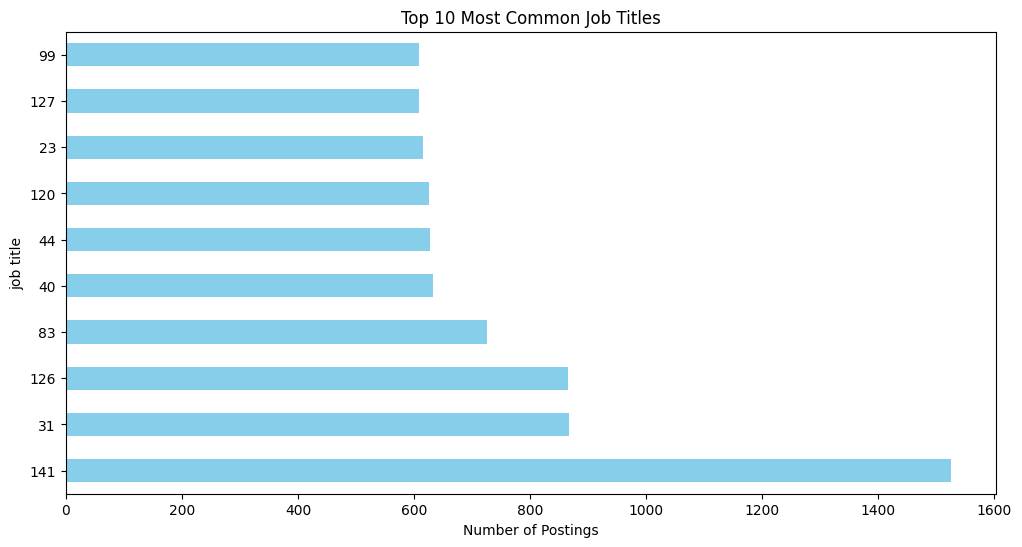

In [24]:
# Plot the top 10 most common job titles
plt.figure(figsize=(12, 6))
df['job title'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('job title')
plt.show()

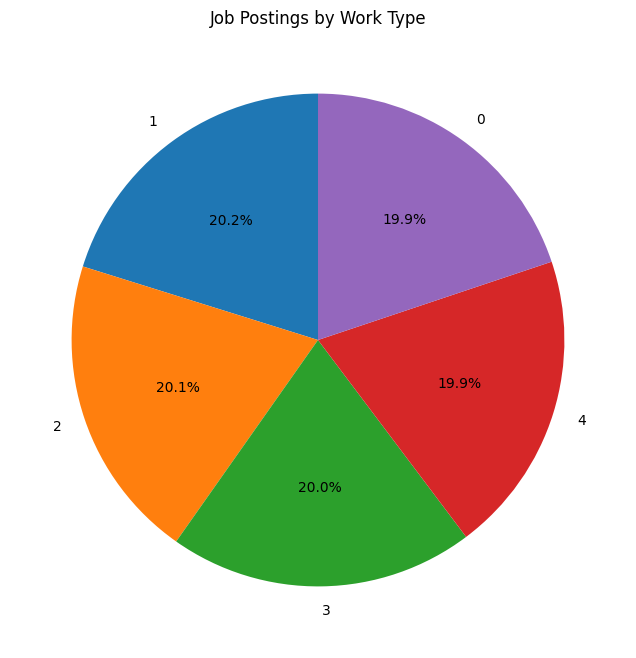

In [25]:
# Calculate work type distribution
work_type_distribution = df['work type'].value_counts()

# Plot pie chart with increased size
plt.figure(figsize=(8, 8))  # Adjust the size as needed
work_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Job Postings by Work Type')
plt.ylabel('')  # Removes the default y-axis label
plt.show()

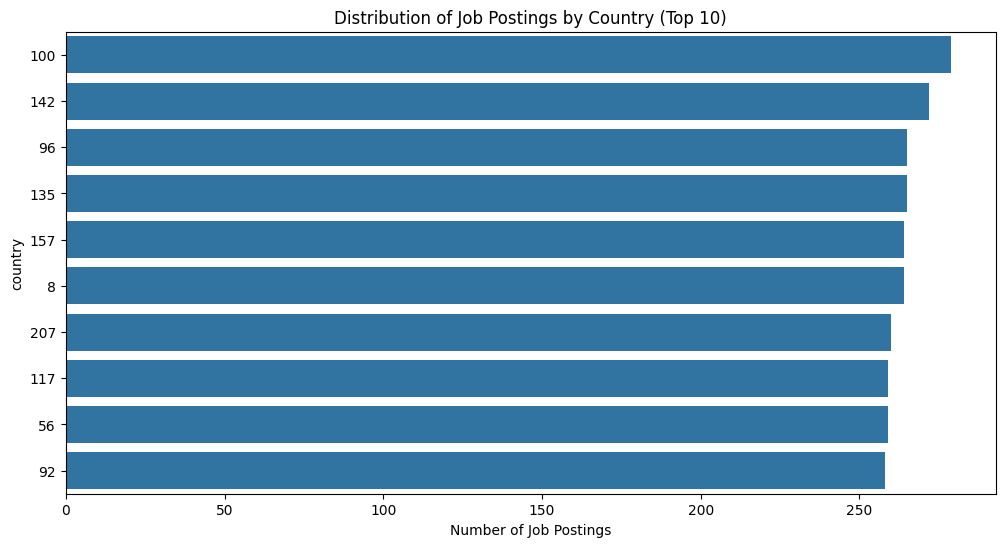

In [26]:
# Get the top 10 countries based on the number of job postings
top_10_countries = df['country'].value_counts().head(10).index

# Plot the distribution of job postings by the top 10 countries
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=df[df['country'].isin(top_10_countries)], order=top_10_countries)
plt.title('Distribution of Job Postings by Country (Top 10)')
plt.xlabel('Number of Job Postings')
plt.ylabel('country')
plt.show()

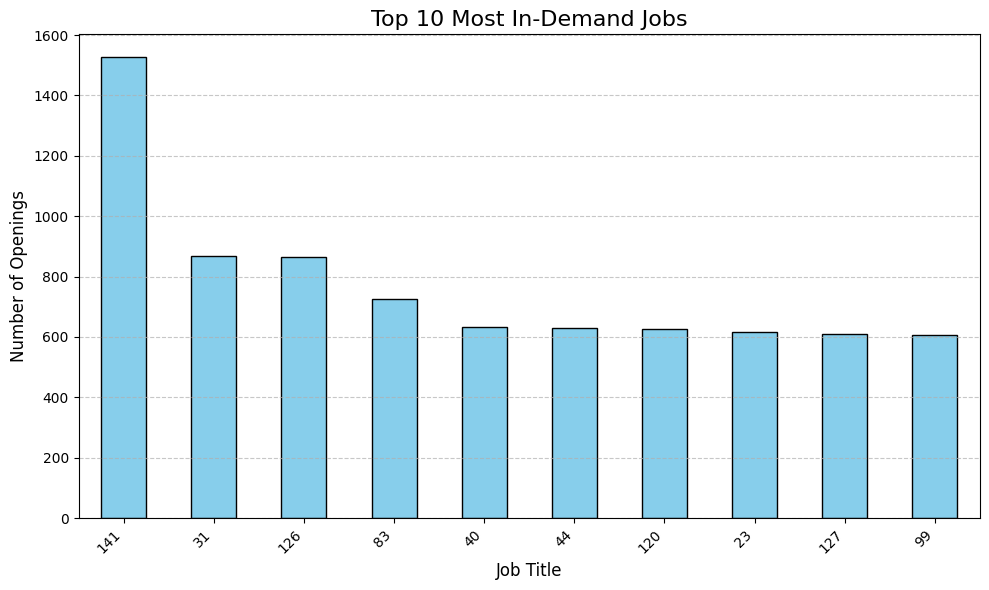

In [44]:
job_counts = df['job title'].value_counts().head(10)  # Top 10 most in-demand jobs

# Plot the data
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Most In-Demand Jobs', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Number of Openings', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

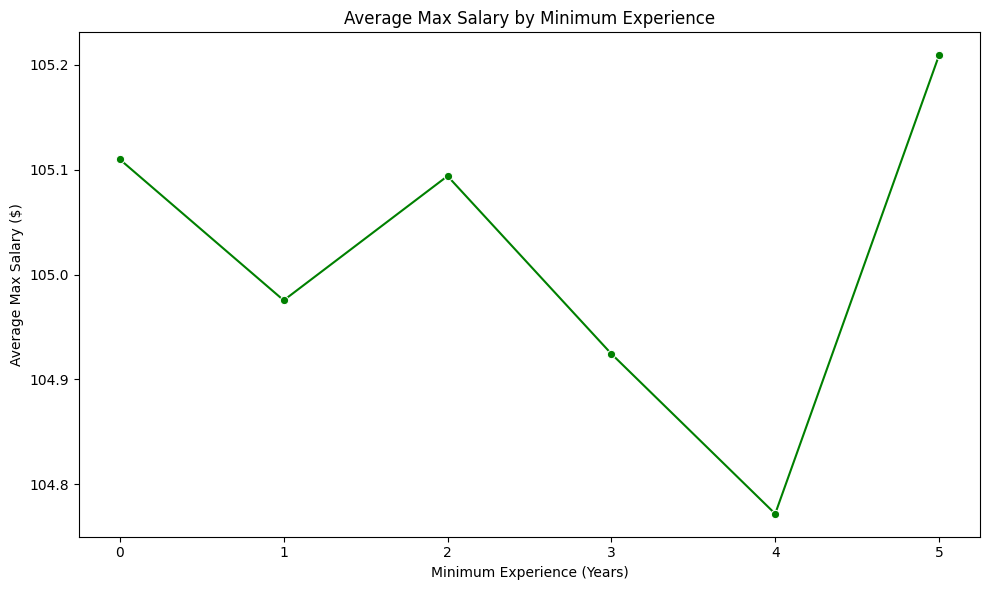

In [48]:
# Assuming that 'min_experience' and 'max_salary' columns are already available
# Group by minimum experience and calculate the average of max_salary for each experience level
experience_salary_comparison = df.groupby('min_experience')['max_salary'].mean()

# Plotting the comparison between minimum experience and average maximum salary
plt.figure(figsize=(10, 6))
sns.lineplot(x=experience_salary_comparison.index, y=experience_salary_comparison.values, marker='o', color='green')
plt.title('Average Max Salary by Minimum Experience')
plt.xlabel('Minimum Experience (Years)')
plt.ylabel('Average Max Salary ($)')
plt.tight_layout()
plt.show()

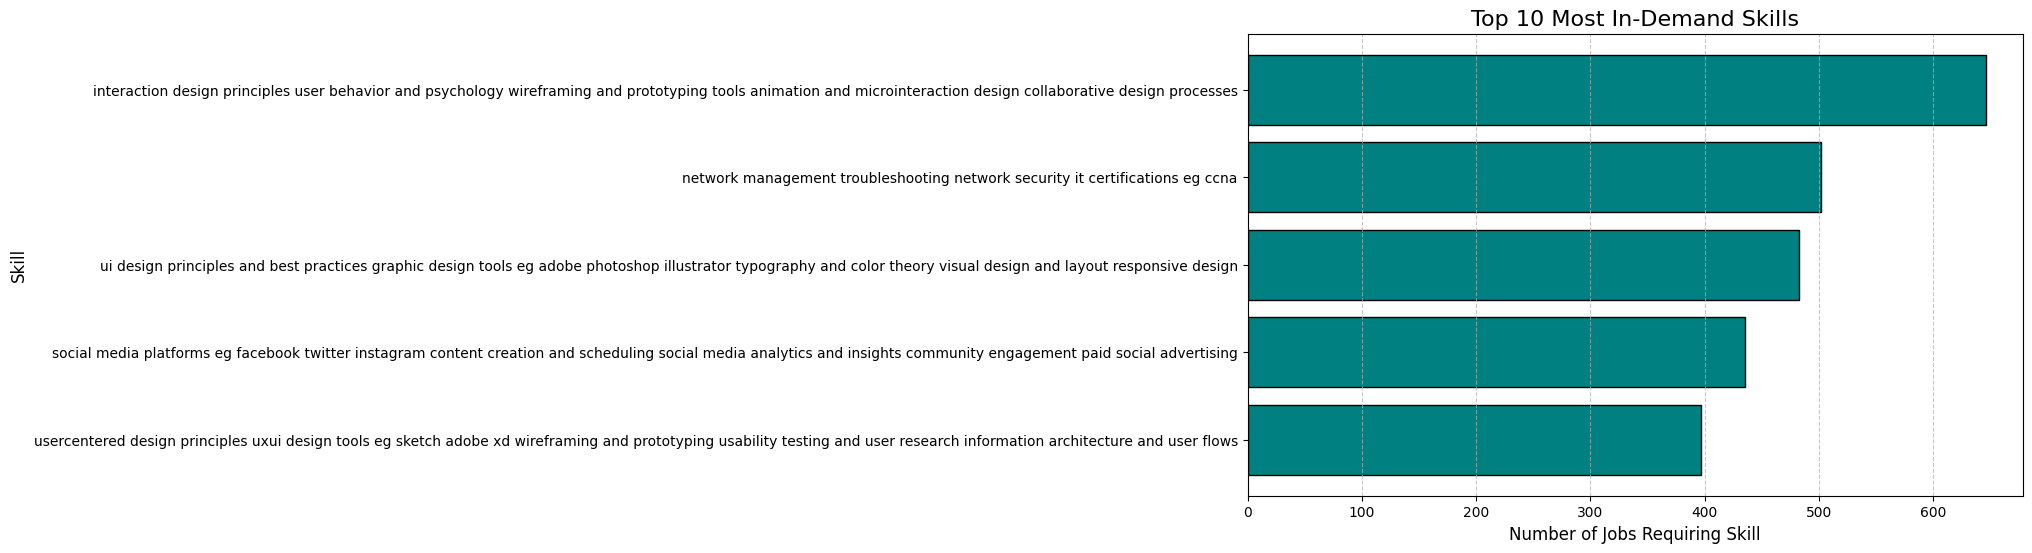

In [50]:
from collections import Counter
all_skills = []
df['skills'].dropna().apply(lambda x: all_skills.extend(x.split(',')))

# Count the frequency of each skill
skill_counts = Counter([skill.strip() for skill in all_skills])  # Strip extra spaces
most_in_demand_skills = skill_counts.most_common(5)  # Top 10 most in-demand skills

# Convert to a DataFrame for easier plotting
skills_df = pd.DataFrame(most_in_demand_skills, columns=['Skill', 'Count'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(skills_df['Skill'], skills_df['Count'], color='teal', edgecolor='black')
plt.title('Top 10 Most In-Demand Skills', fontsize=16)
plt.xlabel('Number of Jobs Requiring Skill', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the most in-demand skill at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

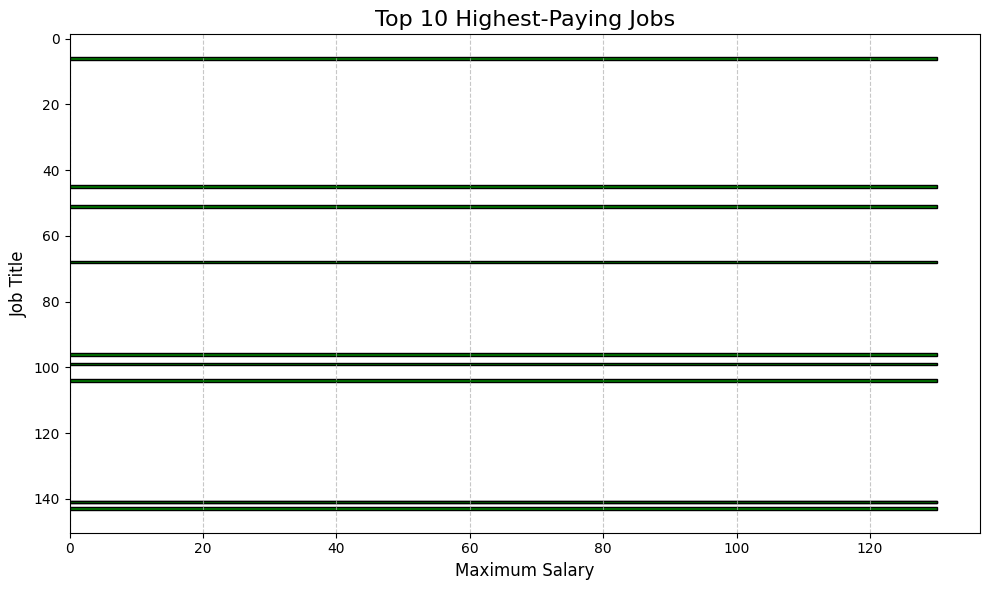

In [51]:
# Get the top 10 highest-paying jobs
highest_paying_jobs = df[['job title', 'max_salary']].sort_values(by='max_salary', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(highest_paying_jobs['job title'], highest_paying_jobs['max_salary'], color='green', edgecolor='black')
plt.title('Top 10 Highest-Paying Jobs', fontsize=16)
plt.xlabel('Maximum Salary', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest-paying job at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='company size', data=df, order=df['company size'].value_counts().index)
plt.title('Job Postings by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()
